In [1]:
#Import Library
import numpy as np
import matplotlib.pyplot as plt
import csv
import io
from scipy.stats import linregress
from sklearn import linear_model
import pylab
from google.colab import files
import pandas as pd
from google.colab import files
uploaded = files.upload()

Saving ex1data2.txt to ex1data2.txt


In [0]:
#Fetching training data
data = np.loadtxt('ex1data2.txt', delimiter=",")
X = data[:,:2]
y = data[:,2]

In [0]:
def featureNormalize(X):

    X_norm = X
    mu    = np.zeros((1, X.shape[1]))
    sigma = np.zeros((1, X.shape[1]))

    for i in range(X.shape[1]):
    	mu[:,i] = np.mean(X[:,i])
    	sigma[:,i] = np.std(X[:,i])
    	X_norm[:,i] = (X[:,i] - float(mu[:,i]))/float(sigma[:,i])
      
    return X_norm, mu, sigma

In [0]:
X, mu, sigma = featureNormalize(X)

In [0]:
#number of training samples
m = y.size

#Add a column of ones to X (interception data)
X = np.c_[np.ones(m), X]

#Initialize theta parameters
theta = np.zeros(shape=(3, 1))

#Some gradient descent settings
num_iters = 60
alpha = 1

In [0]:
def computeCost(X, y, theta):
    
    m = len(y) # number of training examples

    J = 0

    s = np.power(( X.dot(theta) - np.transpose([y]) ), 2)
    J = (1.0/(2*m)) * s.sum( axis = 0 )

    return J

In [0]:

def gradientDescentMulti(X, y, theta, alpha, num_iters):

  m = len(y) # number of training examples
  J_history = np.zeros((num_iters, 1))

  for i in range(num_iters):

      theta = theta - alpha*(1.0/m) * np.transpose(X).dot(X.dot(theta) - np.transpose([y]))

      # Save the cost J in every iteration    
      J_history[i] = computeCost(X, y, theta)
      # print(J_history[i])

  return theta, J_history

In [9]:
#Theta computed from gradientDescent
theta, J_history = gradientDescentMulti(X, y, theta, alpha, num_iters)
print(theta)

[[340412.65957447]
 [109447.79646964]
 [ -6578.35485416]]


In [10]:
#Theta computed from normal equation
theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
print(theta)

[340412.65957447 109447.79646964  -6578.35485416]


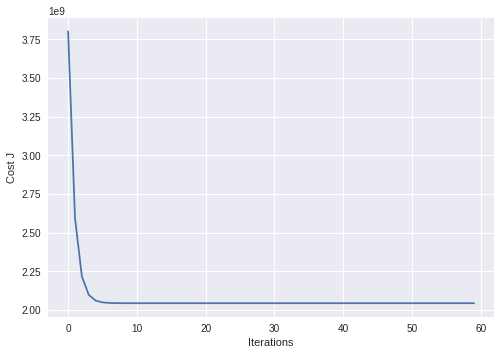

In [11]:
#Convergence of gradient descent with an appropriate learning rate
plt.plot(J_history)
plt.ylabel('Cost J')
plt.xlabel('Iterations');

In [12]:
#Estimate the price of a 1650 sq-ft, 3 br house
price = np.array([1, ((1650-mu.item(0))/sigma.item(0)), ((3-mu.item(1))/sigma.item(1))]).dot(theta)
print('$',price)

$ 293081.4643348961


/usr/local/lib/python3.6/dist-packages/mpl_toolkits/mplot3d/axes3d.py:738: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=293081.4643348961, top=293081.4643348961
  'bottom=%s, top=%s') % (bottom, top))


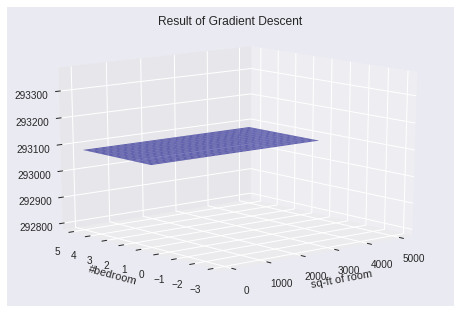

In [52]:
#Plotting Training and regressioned results by gradient descent.
from mpl_toolkits.mplot3d import axes3d as ax
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,1], X[:,2], y, marker='o')
B0 = np.linspace(0, 5000, 25)
B1 = np.linspace(1, 5, 25)
xx, yy = np.meshgrid(B0, B1, indexing='xy')
Z = np.zeros((B0.size,B1.size))

for (i,j),v in np.ndenumerate(Z):
    Z[i,j] = np.array([1, ((1650-mu.item(0))/sigma.item(0)), ((3-mu.item(1))/sigma.item(1))]).dot(theta)
ax.plot_surface(xx, yy, Z,rstride=1, alpha = 0.6, cstride=1, cmap=plt.cm.jet)
ax.set_zlabel('Cost',labelpad = 20)
ax.set_zlim(Z.min(),Z.max())
ax.view_init(elev=15, azim=230)
ax.set_xlabel('sq-ft of room');
ax.set_ylabel('#bedroom');
ax.set_zlabel('Price',labelpad = 20)
ax.set_title('Result of Gradient Descent');
#plt.legend('Training data', 'Linear regression');
plt.show()